```shell
cd ~/link/res_publish/run/plot
conda activate
jupyter nbconvert plot_RA.ipynb --to python

conda activate publish
nohup python plot_RA.py True png Seurat > /dev/null &
nohup python plot_RA.py True png SAMap > /dev/null &
nohup python plot_RA.py True png came > /dev/null &
nohup python plot_RA.py True png csMAHN > /dev/null &

rm plot*.py

conda activate
echo 'finish'

jobs

```

In [1]:
import sys
from pathlib import Path
p_root = Path('.').absolute().parent
None if str(p_root) in sys.path else sys.path.append(str(p_root))

In [2]:
from func import *
sc.settings.verbosity = 0
item = 'RA'
fig_format = 'pdf'

model = ''
if sys.argv[1] == 'True':
    fig_format = sys.argv[2]
    model = sys.argv[3]
assert model in 'Seurat,came,csMAHN,SAMap'.split(','),'[Error] Invalid modle "{}"'.format(model)


p_plot_item = p_plot.joinpath(item)
p_plot_item.mkdir(exist_ok=True,parents=True)

df_para = pd.read_csv(p_cache.joinpath(
    'parameter_{}.csv'.format(item)
))
df_para['path_ref'] = df_para['path_ref'].apply(
    lambda x: p_cache.joinpath(x))
df_para['path_que'] = df_para['path_que'].apply(
    lambda x: p_cache.joinpath(x))

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-01 16:55:11.313153: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



-------------------------help-------------------------
> parameter
    p_root	[name] res_publish
        p_run, p_plot, p_res, p_cache
    p_df_varmap
    map_sp_reverse
    rng
> run
    run_cross_species_models
    h5ad_to_mtx
    load_adata
    get_path_varmap
    find_path_from_para
    load_normalized_adata

> res
    get_test_result_df
    get_res_obs
    show_umap

> plot
    get_color_map
    show_color_map
    show_color
    plot_umap
    savefig



# get res info


[extract]
^(?P<tissue>.+)_(?P<sp_ref>.+)-corss-(?P<sp_que>.+);(?P<model>came|csMAHN|Seurat|SAMap);(?P<name_ref>[\w-]+)-map-(?P<name_que>[[\w-]+);?(?P<resdir_tag>.+)?$


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/pandas/core/strings/accessor.py:2738: FutureWarning: Possible nested set at position 127
  regex = re.compile(pat, flags=flags)


,dir,name,tissue,sp_ref,sp_que,model,name_ref,name_que,resdir_tag
Seurat,/public/workspace/licanchengup/download/res_pu...,RA_h-corss-m;Seurat;RAhfib-map-RAmfib;is_1v1=True,RA,h,m,Seurat,RAhfib,RAmfib,is_1v1=True
SAMap,/public/workspace/licanchengup/download/res_pu...,RA_h-corss-m;SAMap;RAhfib-map-RAmfib;is_1v1=False,RA,h,m,SAMap,RAhfib,RAmfib,is_1v1=False
came,/public/workspace/licanchengup/download/res_pu...,RA_h-corss-m;came;RAhfib-map-RAmfib;epochs=500...,RA,h,m,came,RAhfib,RAmfib,epochs=500;is_1v1=False
csMAHN,/public/workspace/licanchengup/download/res_pu...,RA_h-corss-m;csMAHN;RAhfib-map-RAmfib;epochs=5...,RA,h,m,csMAHN,RAhfib,RAmfib,epochs=500;is_1v1=False


RA_h-corss-m;Seurat;RAhfib-map-RAmfib;is_1v1=True--------------------------


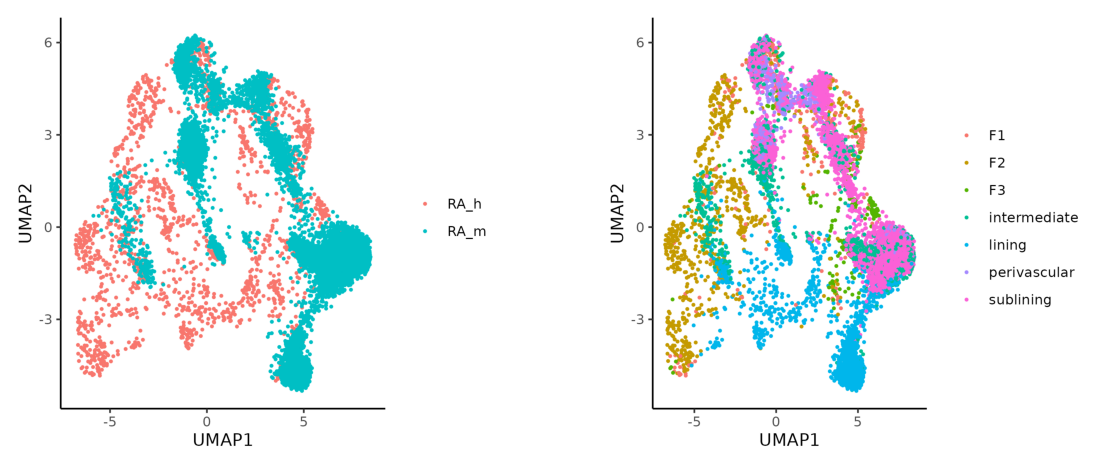

,RA_h,RA_m
cell_type,,
CD34+ sublining,484.0,NaN
HLA-DRA hi sublining,719.0,NaN
DKK3 + sublining,228.0,NaN
lining,413.0,2004.0
intermediate,NaN,2279.0
perivascular,NaN,800.0
sublining,NaN,6624.0


RA_h-corss-m;SAMap;RAhfib-map-RAmfib;is_1v1=False--------------------------


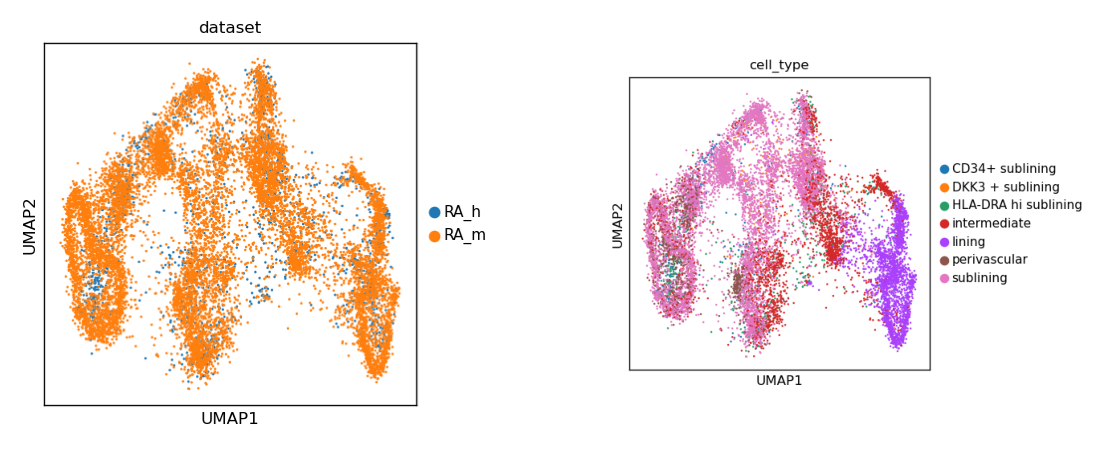

,RA_h,RA_m
sub_cell_type,,
HLA-DRA hi sublining,719.0,NaN
CD34+ sublining,484.0,NaN
lining,413.0,2004.0
DKK3 + sublining,228.0,NaN
sublining,NaN,6624.0
intermediate,NaN,2279.0
perivascular,NaN,800.0


RA_h-corss-m;came;RAhfib-map-RAmfib;epochs=500;is_1v1=False----------------


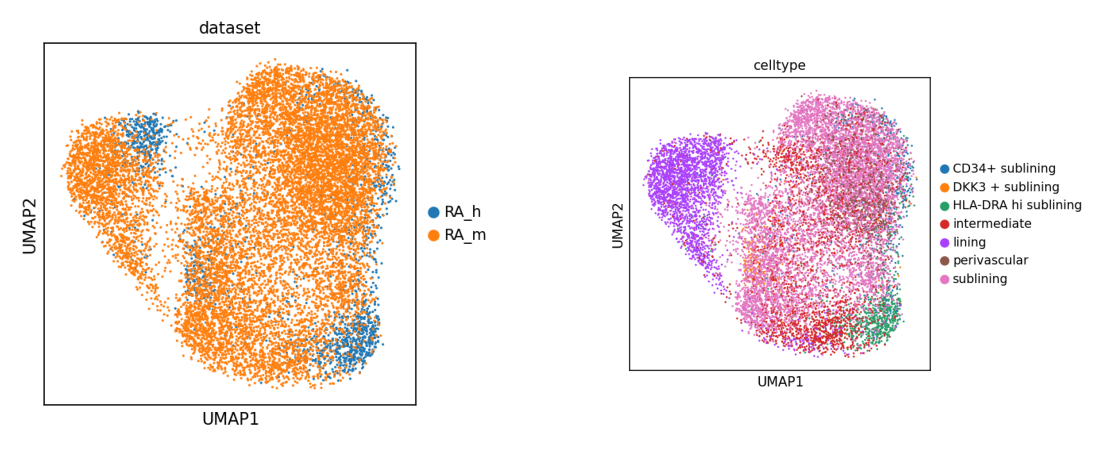

,RA_h,RA_m
sub_cell_type,,
HLA-DRA hi sublining,719.0,NaN
CD34+ sublining,484.0,NaN
lining,413.0,2004.0
DKK3 + sublining,228.0,NaN
sublining,NaN,6624.0
intermediate,NaN,2279.0
perivascular,NaN,800.0


RA_h-corss-m;csMAHN;RAhfib-map-RAmfib;epochs=500;is_1v1=False--------------


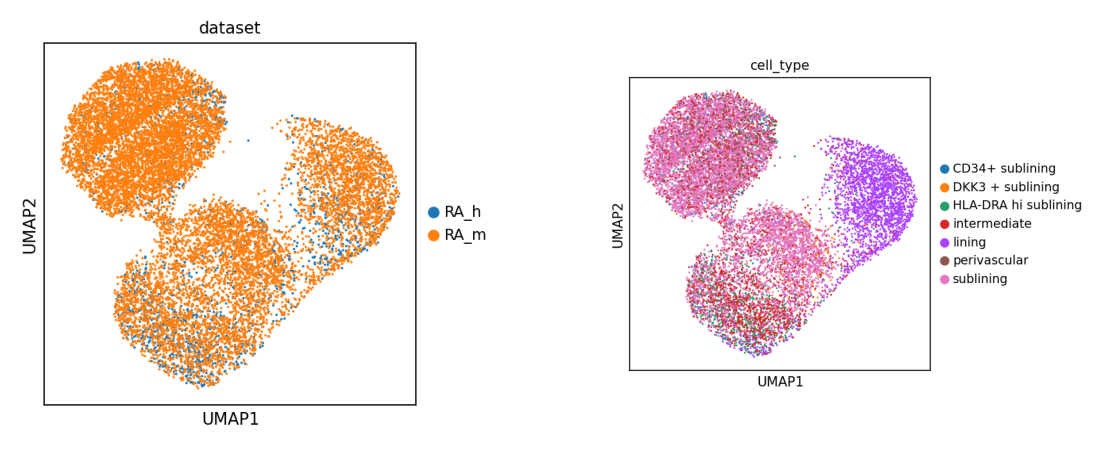

,RA_h,RA_m
sub_cell_type,,
HLA-DRA hi sublining,719.0,NaN
CD34+ sublining,484.0,NaN
lining,413.0,2004.0
DKK3 + sublining,228.0,NaN
sublining,NaN,6624.0
intermediate,NaN,2279.0
perivascular,NaN,800.0


<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

In [3]:
df = get_test_result_df(p_res)
df = df.query("tissue == 'RA'")

df['time_tag'] = df['name'].str.extract(
    ';(\\d{6}-\\d{4})$', expand=False).fillna('')
df = df[df['time_tag'].str.len() == 0]
df = df.drop(columns=['time_tag'])
df = pd.concat([
    df.query("model != 'came' & model != 'csMAHN' "),
df.query("model == 'came' & resdir_tag == 'epochs=500;is_1v1=False' "),
df.query("model == 'csMAHN' & resdir_tag == 'epochs=500;is_1v1=False' ")
])
_temp = df.apply(
    lambda row: '{model}'.format(
        **row), axis=1)
assert _temp.is_unique, '[isnot unique]'
df.index = _temp
del _temp

display(df)
for _i, _row in df.iterrows():
    show_umap(_row)

# set row

In [4]:
row = df.loc[model, :]
df_res = get_res_obs(row)
df_res['sp'] = df_res['dataset_type'].map(
    {i: map_sp[row['sp_{}'.format(i)]] for i in 'ref,que'.split(',')})
display(df_res.head(2))

,UMAP1,UMAP2,cell_type,dataset,is_right,max_prob,pre_label,true_label,dataset_type,sp
cell_name,,,,,,,,,,
S006_L1Q1_M01,0.607119,-2.92770,lining,RA_h,NaN,NaN,NaN,lining,ref,human
S006_L1Q1_M03,-0.472899,-2.72403,lining,RA_h,NaN,NaN,NaN,lining,ref,human


In [5]:
# load_normalized_adata
adata_ref = load_normalized_adata(
    find_path_from_para(
        df_para, _row['name_ref']))
adata_que = load_normalized_adata(
    find_path_from_para(
        df_para, _row['name_que']))
# load obsm['X_umap']
assert adata_que.obs.index.isin(
    df_res.query("dataset_type == 'que'").index).all()
adata_que = adata_que[df_res.query("dataset_type == 'que'").index, :]
adata_que.obs = adata_que.obs.loc[:, []].join(
    df_res.query("dataset_type == 'que'"))
adata_que.obsm['X_umap'] = df_res.query(
    "dataset_type == 'que'").loc[:, 'UMAP1,UMAP2'.split(',')].to_numpy()

assert adata_ref.obs.index.isin(
    df_res.query("dataset_type == 'ref'").index).all()
adata_ref = adata_ref[df_res.query("dataset_type == 'ref'").index, :]
adata_ref.obs = adata_ref.obs.loc[:, []].join(
    df_res.query("dataset_type == 'ref'"))
adata_ref.obsm['X_umap'] = df_res.query(
    "dataset_type == 'ref'").loc[:, 'UMAP1,UMAP2'.split(',')].to_numpy()

# UMAP

In [6]:
adata_umap = sc.AnnData(obs=df_res)
adata_umap.obsm['X_umap'] = df_res.loc[:,
                                       'UMAP1,UMAP2'.split(',')].to_numpy()

lining,DKK3 + sublining,HLA-DRA hi sublining,CD34+ sublining,sublining,intermediate,perivascular
lining,CD34+ sublining,HLA-DRA hi sublining,DKK3 + sublining,sublining,intermediate,perivascular
[out][plot] RA;Seurat;umap;true_label;hm.pdf 
	in /public/workspace/licanchengup/download/res_publish/plot/RA
[out][plot] RA;Seurat;umap;true_label;h.pdf 
	in /public/workspace/licanchengup/download/res_publish/plot/RA
[out][plot] RA;Seurat;umap;true_label;m.pdf 
	in /public/workspace/licanchengup/download/res_publish/plot/RA
[out][plot] RA;Seurat;umap;pre_label;m.pdf 
	in /public/workspace/licanchengup/download/res_publish/plot/RA


<Axes: >

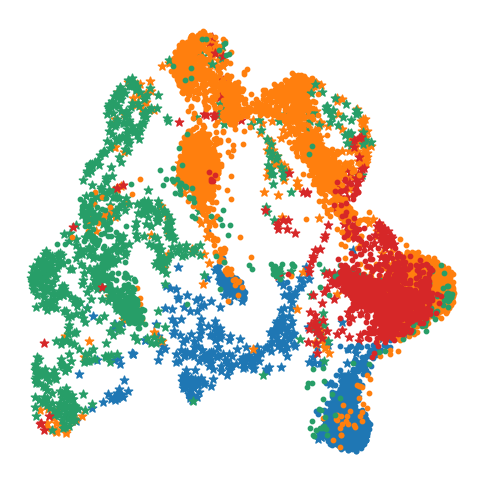

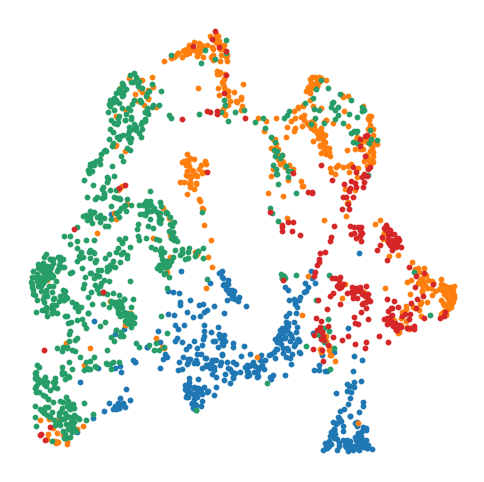

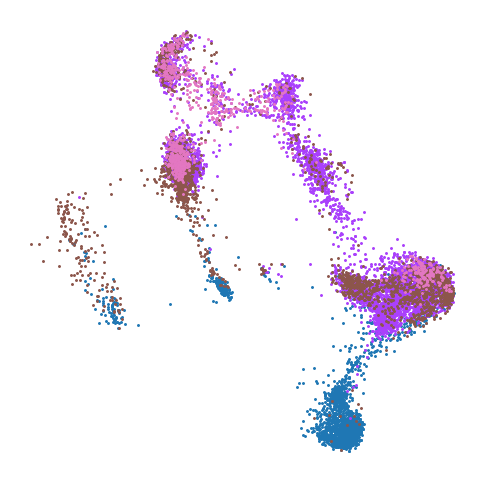

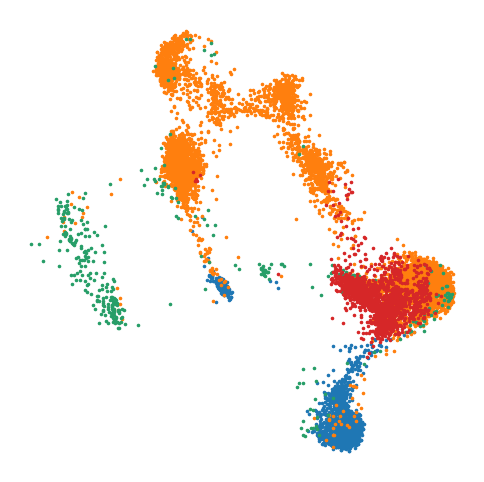

In [7]:
print(','.join(adata_umap.obs['true_label'].unique()))
cell_type_color_map = get_color_map(
    "lining,CD34+ sublining,HLA-DRA hi sublining,DKK3 + sublining,sublining,intermediate,perivascular".split(',')
)
print(','.join(cell_type_color_map.keys()))

# true_label ref,que
save_file_name = '{};{};umap;true_label;hm.{}'.format(
    item, row['model'], fig_format)
ax = plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'ref'],
          'true_label',
          cell_type_color_map,
          size=40,marker='*')
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'que'],
          'pre_label',
          cell_type_color_map,
          size=40,marker='.',ax=ax,
          save_file_name=save_file_name,
          p_plot=p_plot_item)

# true_label ref
save_file_name = '{};{};umap;true_label;h.{}'.format(
    item, row['model'], fig_format)
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'ref'],
          'true_label',
          cell_type_color_map,
          size=40,
          save_file_name=save_file_name,
          p_plot=p_plot_item)
# true_label que
save_file_name = '{};{};umap;true_label;m.{}'.format(
    item, row['model'], fig_format)
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'que'],
          'true_label',
          cell_type_color_map,
          size=5,
          save_file_name=save_file_name,
          p_plot=p_plot_item)
# pre_label que
save_file_name = '{};{};umap;pre_label;m.{}'.format(
    item, row['model'], fig_format)
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'que'],
          'pre_label', cell_type_color_map,
          size=10,
          save_file_name=save_file_name,
          p_plot=p_plot_item
          )



[out][plot] legend.png 
	in /public/workspace/licanchengup/download/res_publish/plot/RA
[out][plot] legend.svg 
	in /public/workspace/licanchengup/download/res_publish/plot/RA
[out][plot] legend.pdf 
	in /public/workspace/licanchengup/download/res_publish/plot/RA


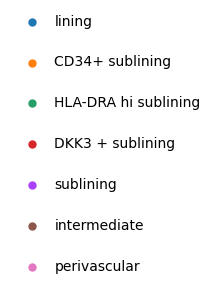

In [8]:
ax = show_color_map(cell_type_color_map,marker='.',size=100,return_ax=True)
savefig(ax.figure,'legend.png',p_plot=p_plot_item)
savefig(ax.figure,'legend.svg',p_plot=p_plot_item)
savefig(ax.figure,'legend.pdf',p_plot=p_plot_item)

# Marker

In [9]:
df_varmap = pd.read_csv(get_path_varmap(
    map_sp[row['sp_ref']], map_sp[row['sp_que']]))
df_varmap.columns = 'gn_ref,gn_que,gn_tpye'.split(',')
df_varmap = df_varmap.dropna().filter(
    regex='^gn_.+')

df_varmap_select = df_varmap[df_varmap['gn_ref'].str.match(
    '(CD34)|(HLA-DRA)|(HLA-DRB1)|(IL6)|(IFI30)|(HLA-DPA1)|(DKK3)|(CD55)', case=False)]
# filter IL6RA
df_varmap_select = df_varmap_select.query("gn_ref != 'IL6R'")
df_varmap_select = df_varmap_select.query("gn_ref != 'IL6ST'")

df_varmap_select = df_varmap_select.assign(
    **{
        'ref_exists': df_varmap_select['gn_ref'].apply(
            lambda x: x in adata_ref.var_names),
        'que_exists': df_varmap_select['gn_que'].apply(
            lambda x: x in adata_que.var_names),
    }
)
display(df_varmap.head(2), df_varmap_select)

,gn_ref,gn_que,gn_tpye
5,MT-ND1,mt-Nd1,ortholog_one2one
9,MT-ND2,mt-Nd2,ortholog_one2one


,gn_ref,gn_que,gn_tpye,ref_exists,que_exists
44903,IFI30,Ifi30,ortholog_one2one,True,False
47136,HLA-DRA,H2-Ea,ortholog_one2one,True,False
58884,CD34,Cd34,ortholog_one2one,True,True
63738,HLA-DRB1,H2-Eb2,ortholog_one2many,True,True
65048,DKK3,Dkk3,ortholog_one2one,True,True
67754,IL6,Il6,ortholog_one2one,True,True
74806,CD55,Cd55,ortholog_one2many,True,True
74807,CD55,Cd55b,ortholog_one2many,True,True


[out][plot] RA;Seurat;Marker;h.pdf 
	in /public/workspace/licanchengup/download/res_publish/plot/RA
[out][plot] RA;Seurat;Marker;m.pdf 
	in /public/workspace/licanchengup/download/res_publish/plot/RA


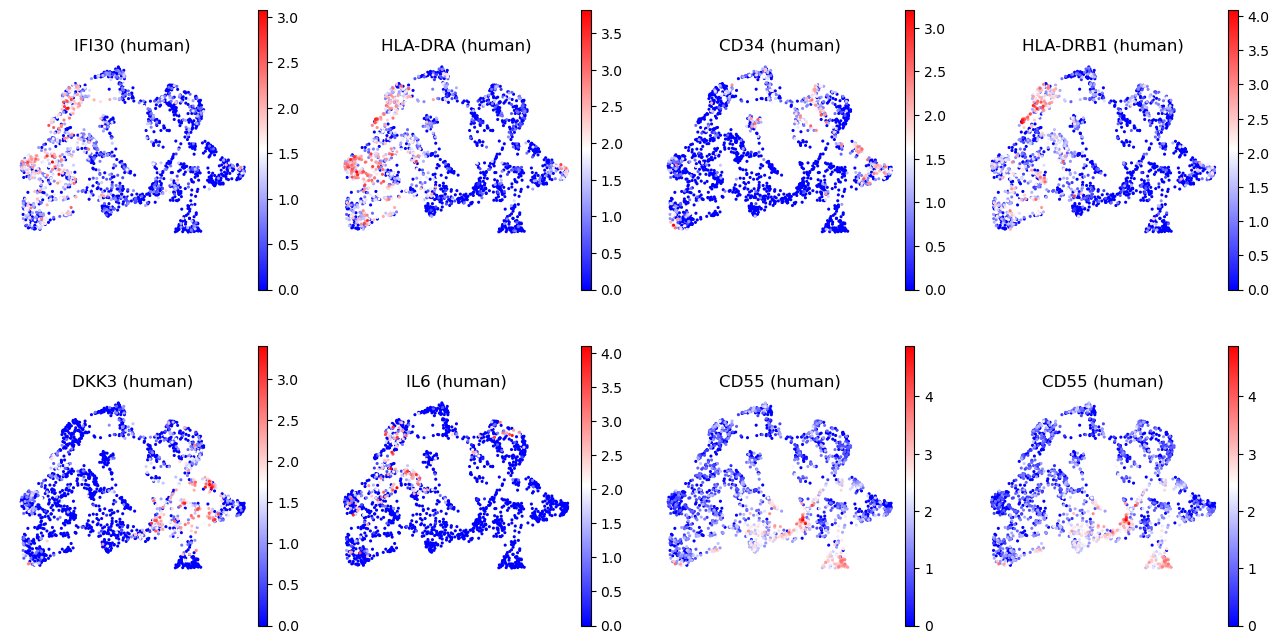

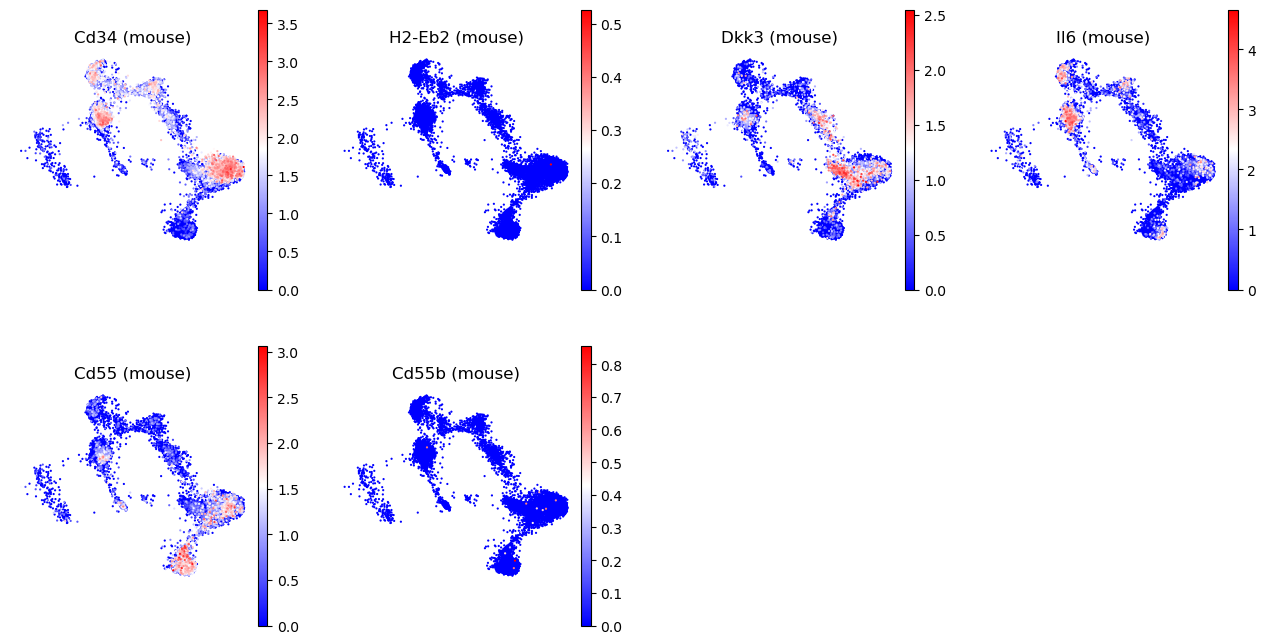

In [10]:
nrows = 2
ncols = 4
# marker ref
fig, axs = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(
        4*ncols, 4*nrows),)
for ax, gene in zip_longest(np.ravel(axs), df_varmap_select.query(
        "ref_exists")['gn_ref'], fillvalue=None):
    ax.set_aspect('equal')
    if gene:
        sc.pl.umap(adata_ref, color=[gene],
                   # vmax=5,vmin=0,
                   ncols=2,
                   sort_order=True,
                   cmap='bwr',
                   size=20,
                   show=False,
                   colorbar_loc='right',
                   ax=ax,
                   frameon=False, title='{} (human)'.format(gene)
                   )
    else:
        fig.delaxes(ax)
savefig(fig, '{};{};Marker;h.{}'.format(item, row['model'], fig_format),
          p_plot=p_plot_item)
# marker que
fig, axs = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(
        4*ncols, 4*nrows),)
for ax, gene in zip_longest(np.ravel(axs), df_varmap_select.query(
        "que_exists")['gn_que'], fillvalue=None):
    ax.set_aspect('equal')
    if gene:
        sc.pl.umap(adata_que, color=[gene],
                   # vmax=5,vmin=0,
                   ncols=2,
                   sort_order=True,
                   cmap='bwr',
                   size=10,
                   show=False,
                   colorbar_loc='right',
                   ax=ax,
                   frameon=False, title='{} (mouse)'.format(gene)
                   )
    else:
        fig.delaxes(ax)
savefig(fig, '{};{};Marker;m.{}'.format(item, row['model'], fig_format),
          p_plot=p_plot_item)

# sub fibroblasts

In [11]:
df_plot = df_res.query("dataset_type == 'que'").copy()
df_obs_que = pd.read_csv(row['dir'].joinpath('obs_que.csv'), index_col=0)
df_obs_que['label'] = df_obs_que.apply(
    lambda _: '{status} {label}'.format(**_), axis=1)
display(df_obs_que.head(2))
df_plot = df_plot.join(df_obs_que.loc[:, 'label'])
display(df_plot.head(2))
df_plot = pd.merge(
    group_agg(df_plot, 'label,pre_label'.split(','), {'pre_label': ['count']}),
    df_plot['label'].value_counts().to_frame('label_count').reset_index(),
    on='label', how='outer'
)
df_plot['ratio'] = df_plot.eval("pre_label_count/label_count")
df_plot = df_plot.pivot(
    index='label', columns='pre_label', values='ratio'
)

df_plot = df_plot.loc[
    'Healty WT,Healty KO-Notch3,RA WT,RA KO-Notch3,RA WT ISO,RA WT anti-NRR3'.split(','),
    'CD34+ sublining,HLA-DRA hi sublining,DKK3 + sublining,lining'.split(',')
]
df_plot

,cell_name,orig.ident,nCount_RNA,nFeature_RNA,X_batch,status,label,sampleID,cell_type,sub_cell_type
AAACCTGAGAACAATC_BRI203,AAACCTGAGAACAATC_BRI203,SeuratProject,6210,1994,Healty;WT;BRI203,Healty,Healty WT,BRI203,fibroblast,perivascular
AAACCTGAGCTCCCAG_BRI203,AAACCTGAGCTCCCAG_BRI203,SeuratProject,11015,2858,Healty;WT;BRI203,Healty,Healty WT,BRI203,fibroblast,sublining


,UMAP1,UMAP2,cell_type,dataset,is_right,max_prob,pre_label,true_label,dataset_type,sp,label
cell_name,,,,,,,,,,,
AAACCTGTCGAACGGA_BRI062,3.282192,2.578605,sublining,RA_m,False,0.619858,CD34+ sublining,sublining,que,mouse,RA WT
AAACCTGTCGGCTTGG_BRI062,4.104772,-4.820078,lining,RA_m,True,0.768236,lining,lining,que,mouse,RA WT


pre_label,CD34+ sublining,HLA-DRA hi sublining,DKK3 + sublining,lining
label,,,,
Healty WT,0.837158,0.003279,0.103279,0.056284
Healty KO-Notch3,0.676981,0.003201,0.092291,0.227527
RA WT,0.557169,0.219601,0.121597,0.101633
RA KO-Notch3,0.853687,0.002304,0.048387,0.095622
RA WT ISO,0.444444,0.045455,0.387511,0.122590
RA WT anti-NRR3,0.675360,0.041367,0.125899,0.157374


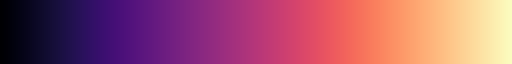

In [12]:
cm = mpl.colormaps['magma']
cm

{'CD34+ sublining': 'F1',
 'HLA-DRA hi sublining': 'F2',
 'DKK3 + sublining': 'F3',
 'lining': 'liining'}

CD34+ sublining
[out][plot] RA;Seurat;bar;F1.pdf 
	in /public/workspace/licanchengup/download/res_publish/plot/RA
HLA-DRA hi sublining
[out][plot] RA;Seurat;bar;F2.pdf 
	in /public/workspace/licanchengup/download/res_publish/plot/RA
DKK3 + sublining
[out][plot] RA;Seurat;bar;F3.pdf 
	in /public/workspace/licanchengup/download/res_publish/plot/RA
lining
[out][plot] RA;Seurat;bar;liining.pdf 
	in /public/workspace/licanchengup/download/res_publish/plot/RA


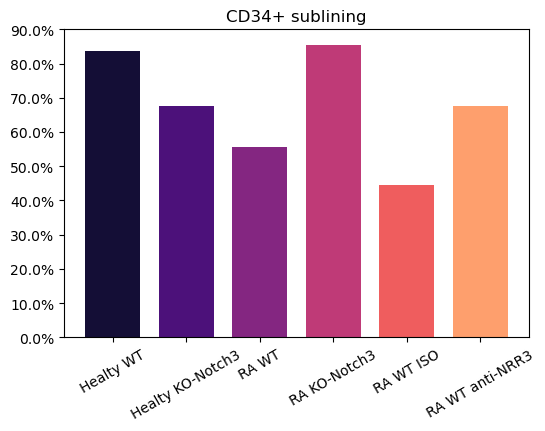

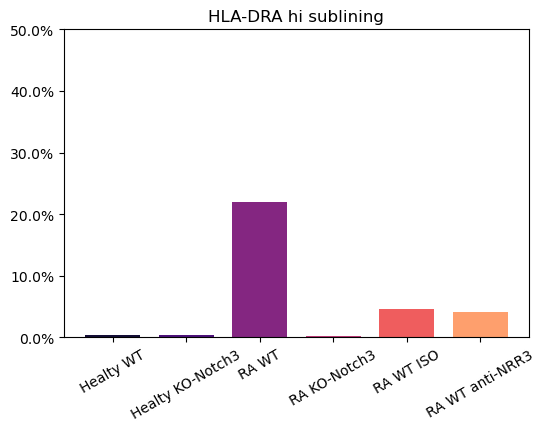

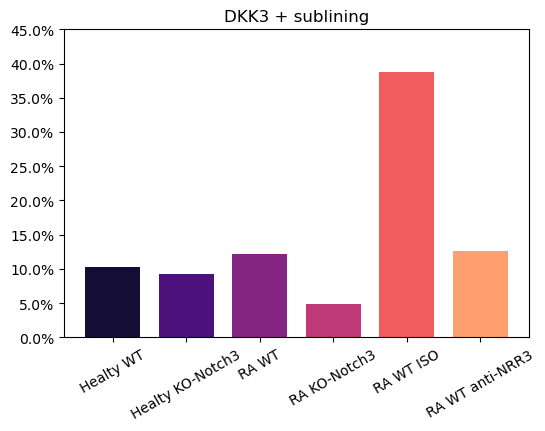

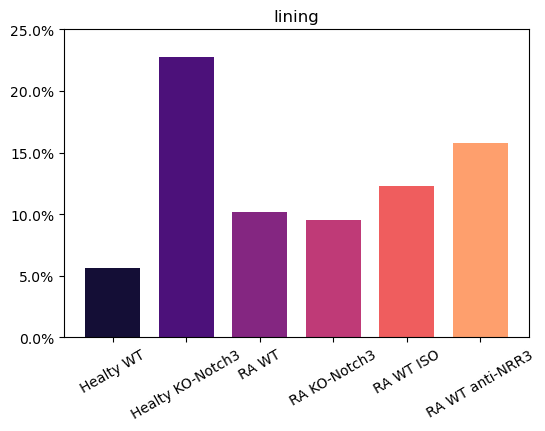

In [13]:
_map = {k:v for k,v in zip(df_plot.columns,'F1,F2,F3,liining'.split(','))}
display(_map)
for sub_fib in df_plot.columns:
    print(sub_fib)
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    ax.bar(x=1 + np.arange(df_plot[sub_fib].size),
           height=df_plot[sub_fib],
           width=.75,
           color=[cm(i) for i in np.linspace(.1, .8, df_plot.index.size)])
    # ax.set_xticklabels()
    ax.set_title(sub_fib)
    ax.set_xticks(
        1 + np.arange(df_plot[sub_fib].size),
        df_plot.index.to_list(), rotation=30
    )
    ax.set_yticks(
        ax.get_yticks(),
        ['{:.1f}%'.format(_) for _ in 100*ax.get_yticks()]
    )
    if _map[sub_fib] == 'F2':
        ax.set_ylim(0, 0.5)
        ax.set_yticks(
        np.linspace(0,0.5,6),
        ['{:.1f}%'.format(_) for _ in 100*np.linspace(0,0.5,6)]
    )


    savefig(
        fig,
        '{};{};bar;{}.{}'.format(item, row['model'],_map[sub_fib], fig_format),
          p_plot=p_plot_item
    )

In [14]:
print("\n[finish]\n".center(100,"-"))

---------------------------------------------
[finish]
---------------------------------------------
